<a href="https://colab.research.google.com/github/Shunl1996/CIS545_HWs/blob/hw1/CIS_545_HW1_Student_Version_Fall_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CIS 545 Homework 1: Data Wrangling and Cleaning
> Fall 2020 | Due September 30th, 10:00 PM EST

Hello future data scientists and welcome to CIS 545! In this homework, you will familiarize yourself with Pandas 🐼! The cutest animal and one of the essential libraries for Data Science. This homework is focused on one of the most important tasks in Data Science, preparing datasets so that they can be analyzed, plotted, used for machine learning models, etc...

This homework will be broken into analyzing two datasets across five sections (although section 1 has the most sub-parts)!

1. Working with New York flu and hospital acquired infection data

2. Working with Airbnb and Uber Data and on a merged/joined version of the Airbnb and Uber datasets (More on this later...)

**Note: Before starting, you must click on the "Copy To Drive" option in the top bar. This is the master notebook so <u>you will not be able to save your changes without copying it </u>! Once you click on that, make sure you are working on that version of the notebook so that your work is saved** 

Run the following two cells to setup the notebook

In [1]:
%%capture
!pip3 install penngrader
!pip3 install py_stringsimjoin
!pip install python-Levenshtein

from penngrader.grader import *

# Import neccessary libraries
!pip install geocoder
import pandas as pd
import numpy as np
import seaborn as sns
from string import ascii_letters
import matplotlib.pyplot as plt
from datetime import datetime
import time
import geocoder
import py_stringsimjoin as ssj
import py_stringmatching as sm
from Levenshtein import distance
from difflib import SequenceMatcher
import requests
from lxml import html

In [2]:
!wget https://penn-cis545-files.s3.amazonaws.com/NY_Hospital_Acquired_Infections__Beginning_2008.csv
!wget https://penn-cis545-files.s3.amazonaws.com/UPDATED_2_zillow_df.csv
!wget https://penn-cis545-files.s3.amazonaws.com/UPDATED_2_airbnb_df.csv
!wget https://penn-cis545-files.s3.amazonaws.com/UPDATED_3_NY_Flu_Confirmed_Cases_By_County__Beginning_2009_10_Season.csv

--2020-09-27 17:39:23--  https://penn-cis545-files.s3.amazonaws.com/NY_Hospital_Acquired_Infections__Beginning_2008.csv
Resolving penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)... 52.216.232.227
Connecting to penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)|52.216.232.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4303682 (4.1M) [text/csv]
Saving to: ‘NY_Hospital_Acquired_Infections__Beginning_2008.csv’

NY_Hospital_Acquire 100%[===================>]   4.10M  7.67MB/s    in 0.5s    

2020-09-27 17:39:24 (7.67 MB/s) - ‘NY_Hospital_Acquired_Infections__Beginning_2008.csv’ saved [4303682/4303682]

--2020-09-27 17:39:24--  https://penn-cis545-files.s3.amazonaws.com/UPDATED_2_zillow_df.csv
Resolving penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)... 52.216.108.11
Connecting to penn-cis545-files.s3.amazonaws.com (penn-cis545-files.s3.amazonaws.com)|52.216.108.11|:443... connected.
HTTP requ

#What is Pandas?

<div class = "row">
<div class="column">
Apart from animals, Pandas is a Python library to aid with data manipulation/analysis. It is built with support from Numpy. Numpy is another Python package/library that provides efficient calculations for matricies and other math problems.
</div><div class="column">
<p class="d-flex" align = "center">
<img src = "https://thehill.com/sites/default/files/styles/article_full/public/panda_getty.jpg?itok=4ce_5sip" height= "200" align ="center"/>
<img src = "https://cff2.earth.com/uploads/2016/09/08101343/giant-panda-bear_1big_stock1.jpg" height= "200" align ="center"/>
</p>
</div>
</div>




Let's also get familiarized with the **PennGrader**. It was developed specifically for 545 by a previous TA, Leonardo Murri. 
<br>

PennGrader was developed to provide students with instant feedback on their answer. You can submit your answer and know whether it's right or wrong instantly. We then record your most recent answer in our backend database. Let's try it out! Fill in the cell below with your 8-digit Penn ID and then run the following cell to initialize the grader.

In [3]:
# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 29785339 # YOUR PENN-ID GOES HERE AS AN INTEGER #

In [4]:
grader = PennGrader(homework_id = 'CIS545_Fall_2020_HW1', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 29785339

Make sure this correct or we will not be able to store your grade


Pandas (the animal) are lazy. Their days are made up of eating and sleeping. Just like mine. Let's run a cell just to make sure PennGrader works

#### **TODO: PennGrader Check**
- Change `favorite_activity` to whichever panda "activity" you prefer (2 point)

<br>

**Note**: We'll use cells like these "TODO" above to indicate what is important to have in each section of the notebook. Some general guidelines:

- You don't have to do all of these in one cell/step; we're just labeling them for each section which might have smaller sub-sections (ex: look at how 1.2 is set up) for your reference
- Make sure to read these carefully and do everything that is asked
- Make sure to run all the PennGrader test cells; if we forgot anything, please let us know ASAP on Piazza so that we can update the Markdown cells here

In [5]:
# In this cell, put which panda activity you prefer in lowercase(eating or sleeping)
# Input activity name in all lowercase
favorite_activity = "eating"

In [6]:
# Run this cell to submit to PennGrader!

# [CIS 545 PennGrader Cell] - 2 point
grader.grade(test_case_id = 'panda_test', answer = favorite_activity)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You just had your first experience with the Penn Grader! For the future questions, once you have completed a question, you can submit your answer to the Penn Grader for immediate feedback. Awesome, right?

We will use scores from Penn Grader to determine your grade. You will still need to submit your notebook so we can check for cheating and plagarism. Do not cheat. 

**Note:** If you run Penn Grader after the due date for any question, your assignment will be marked late, even if you already had full points for the question before the deadline. To remedy this, if you're going to run your notebook after the deadline, either do not run the grading cells, or reinitialize the grader with an empty or clearly fake ID such as <code>999999999999</code> (please use 10+ digits to be clearly a fake <code>STUDENT_ID</code>)

#Adding our data so that our code can find it

We can't be data scientist without data! We provided code for you to download the data (the "wget" cell from earlier). If you go to the view on the left and click files, you should see something similar to this image

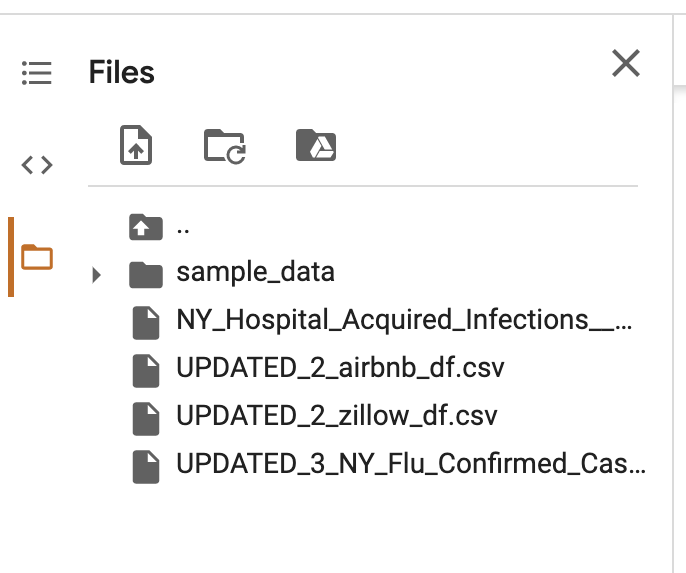

#Part 1: Working with New York Influenza and Hospital-Acquired Infection Data

In this part of the homework we will be working with two different healthcare focused datasets! 

The New York Influenza dataset contains data about flu cases in New York. The New York Hospital-Acquired Infection dataset contains information pertaining to infections patients acquired while in different hospitals across New York state.

Let's first get both of our datasets loaded into two Pandas Dataframes, one for each of the datasets. Use pandas' <code>read_csv</code> functionality, which you can find documentation for here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

While reading documentation is hard at first, we **strongly encourage you** to get into a good habit of it, since many times your questions will be answered directly by the documentation (ex: "why isn't my dataframe dropping duplicates" or "why didn't this dataframe update").

#### **TODO: Part 1 Intro**
- Save the Hopsital-Acquired dataframe to a variable named: <code>hospital_df</code>
- Save the New York Influenza dataframe to a variable named: <code>flu_df</code>
- Save the data types to `flu_df_types` (2 point)

In [7]:
# TODO: Import your two files to pandas dataframes -- make sure the dataframes are named correctly!
hospital_df = pd.read_csv('/content/NY_Hospital_Acquired_Infections__Beginning_2008.csv')
flu_df = pd.read_csv('/content/UPDATED_3_NY_Flu_Confirmed_Cases_By_County__Beginning_2009_10_Season.csv')

In [8]:
# Now runs this cell to update the column names; please don't delete this!
hospital_df.columns = [column.replace(' ', '_') for column in hospital_df.columns]
flu_df.columns = [column.replace(' ', '_') for column in flu_df.columns]

The cell above uses list comphrension in python, if you are unfamiliar with this concept you can read more about it here: https://docs.python.org/3/tutorial/datastructures.html

Let's focus on the flu_df for now. We will work with the hospital dataframe in a bit. We would like to take a look at what the flu dataframe looks like. Display the first 10 rows of the dataframe in the cell below (take a look at the documentation to find now to do this!)

In [9]:
# TODO: Display the first 10 rows of `flu_df`
flu_df.head(n=10)

,Season,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,FIPS
0,2010-2011,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",36061
1,2010-2011,NYC,NEW YORK,12/18/2010,INFLUENZA_B,0,"(40.7831, -73.9712)",36061
2,2010-2011,NYC,RICHMOND,10/16/2010,INFLUENZA_A,0,"(40.5795, -74.1502)",36085
3,2011-2012,NYC,KINGS,10/22/2011,INFLUENZA_A,0,"(40.6782, -73.9442)",36047
4,2012-2013,WESTERN,SENECA,04/06/2013,INFLUENZA_A,0,"(42.7652, -76.8721)",36099
5,2014-2015,WESTERN,WAYNE,01/24/2015,INFLUENZA_B,2,"(43.202, -77.0104)",36117
6,2014-2015,NYC,RICHMOND,05/02/2015,INFLUENZA_B,0,"(40.5795, -74.1502)",36085
7,2017-2018,NYC,RICHMOND,10/14/2017,INFLUENZA_A,0,"(40.5795, -74.1502)",36085
8,2017-2018,NYC,BRONX,11/04/2017,INFLUENZA_A,6,"(40.8448, -73.8648)",36005
9,2017-2018,METRO,PUTNAM,12/30/2017,INFLUENZA_A,8,"(41.4351, -73.7949)",36079


Another thing that is often times helpful to do is inspect the types of each column in a dataframe. Output the types of the flu_df in this cell below. 

In [10]:
# TODO: Display the datatypes in `flu_df`
flu_df.dtypes

Season              object
Region              object
County              object
Week_Ending_Date    object
Disease             object
Count                int64
County_Centroid     object
FIPS                 int64
dtype: object

Save the types of the the Season, Region, Count, and FIPS columns to a series and pass them into the autograder cell below.

In [11]:
# TODO: Just a warmup to get exposed to indexing and series vs. dataframe
flu_df_types= flu_df[['Season','Region','Count','FIPS']].dtypes.to_frame()
flu_df_types = flu_df_types[0]

In [12]:
# View the output here!
flu_df_types

Season    object
Region    object
Count      int64
FIPS       int64
Name: 0, dtype: object

Pass series you just created into the "answer" parameter below (2 point)

In [13]:
# [CIS 545 PennGrader Cell] - 2 point
grader.grade(test_case_id = 'flu_df_types', answer = flu_df_types)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.1 Dropping data

When you work with data, you'll have NaNs, duplicates or columns that don't give much insight into the data. There are different ways to deal with missing values (i.e. imputation, which you can read into on your own), but for now, let's drop some of these rows to clean up our data. Note that there might be multiple ways to do each step.


Refer to the documentation if you get stuck -- it's your best friend!

<br>

#### **TODO: 1.1**

- Drop duplicate rows
- Drop rows that have nulls (e.g. NaN) in them
- Drop the "Season" and "FIPS" columns. These columns aren't neccessary for the rest of the homework.
- Drop all rows with the "Count" column equal to 0
- Save the result to `flu_df_cleaned` (5 points)

In [14]:
flu_df

,Season,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,FIPS
0,2010-2011,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",36061
1,2010-2011,NYC,NEW YORK,12/18/2010,INFLUENZA_B,0,"(40.7831, -73.9712)",36061
2,2010-2011,NYC,RICHMOND,10/16/2010,INFLUENZA_A,0,"(40.5795, -74.1502)",36085
3,2011-2012,NYC,KINGS,10/22/2011,INFLUENZA_A,0,"(40.6782, -73.9442)",36047
4,2012-2013,WESTERN,SENECA,04/06/2013,INFLUENZA_A,0,"(42.7652, -76.8721)",36099
...,...,...,...,...,...,...,...,...
64513,2019-2020,CAPITAL DISTRICT,MONTGOMERY,12/21/2019,INFLUENZA_A,7,"(42.9008912, -74.4353575)",36057
64514,2019-2020,CENTRAL,ST LAWRENCE,10/19/2019,INFLUENZA_A,0,"(44.4881125, -75.074311)",36089
64515,2018-2019,WESTERN,YATES,01/05/2019,INFLUENZA_B,0,"(42.6431, -77.1485)",36123
64516,2019-2020,CAPITAL DISTRICT,FULTON,02/15/2020,INFLUENZA_UNSPECIFIED,0,"(43.1156093, -74.4236782)",36035


In [15]:
# TODO: Drop duplicate rows
flu_df_cleaned = flu_df.drop_duplicates()

In [16]:
# TODO: Drop the Season and FIPS columns
flu_df_cleaned = flu_df_cleaned.drop(columns= ['Season','FIPS'])

In [17]:
# TODO: Drop rows that have any nulls (NaN) in them
flu_df_cleaned= flu_df_cleaned.dropna()

In [18]:
# Drop all rows with the "Count" column equal to 0
flu_df_cleaned = flu_df_cleaned[flu_df_cleaned['Count']!=0]


View your dataframe again to check if you dropped the columns and the appropriate rows properly:

In [19]:
flu_df_cleaned

,Region,County,Week_Ending_Date,Disease,Count,County_Centroid
0,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)"
5,WESTERN,WAYNE,01/24/2015,INFLUENZA_B,2,"(43.202, -77.0104)"
8,NYC,BRONX,11/04/2017,INFLUENZA_A,6,"(40.8448, -73.8648)"
9,METRO,PUTNAM,12/30/2017,INFLUENZA_A,8,"(41.4351, -73.7949)"
10,CAPITAL DISTRICT,SCHENECTADY,03/31/2012,INFLUENZA_A,1,"(42.8175421, -74.0435834)"
...,...,...,...,...,...,...
64498,WESTERN,CHEMUNG,01/04/2020,INFLUENZA_B,34,"(42.1552807, -76.7471788)"
64504,CAPITAL DISTRICT,RENSSELAER,03/28/2020,INFLUENZA_B,3,"(42.7104206, -73.5138454)"
64509,CENTRAL,ONONDAGA,12/14/2019,INFLUENZA_A,45,"(43.0065299, -76.1961167)"
64511,CAPITAL DISTRICT,ALBANY,01/25/2020,INFLUENZA_B,51,"(42.5882713, -73.9740136)"


Pass the cleaned Flu dataframe to the following cell as the input for the "answer" parameter (5 points)

In [20]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flu_drop_test', answer = flu_df_cleaned)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.2 Extracting Month, Day, Year of Each Row in the flu_df

Next, let's filter out information from the Ending Date Column. We want to add columns for Month, Day, and Year of the Ending Date. Make sure these new columns have datatypes that allow for mathematical operations.

Hint: Highly recommend using the "apply" function

#### **TODO: 1.2**
- Extract the columns `Year`, `Month` and `Day` from the `Week_Ending_Date` column -- this is case-sensitive!
- Convert these columns to a sensible type that would allow us to do mathematical operations on them (hint: strings probably won't be so good here)
- Store this as `flu_df_cleaned` (5 points)

- Extract columns for `Latitude` and `Longitude` appropriately and update `flu_df_cleaned` (5 points)

- Compute the average week number that data was collected on and store it in `mean_week_num_collected` (5 points)

In [21]:
# TODO: First, extract the Month, Day, and Year of each entry into a numeric type (see the `apply` function).
flu_df_cleaned['Month']= flu_df_cleaned['Week_Ending_Date'].apply(lambda x: int(x.split('/')[0]))
flu_df_cleaned['Day']= flu_df_cleaned['Week_Ending_Date'].apply(lambda x: int(x.split('/')[1]))
flu_df_cleaned['Year']= flu_df_cleaned['Week_Ending_Date'].apply(lambda x: int(x.split('/')[2]))


In [22]:
flu_df_cleaned

,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,Month,Day,Year
0,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,2010
5,WESTERN,WAYNE,01/24/2015,INFLUENZA_B,2,"(43.202, -77.0104)",1,24,2015
8,NYC,BRONX,11/04/2017,INFLUENZA_A,6,"(40.8448, -73.8648)",11,4,2017
9,METRO,PUTNAM,12/30/2017,INFLUENZA_A,8,"(41.4351, -73.7949)",12,30,2017
10,CAPITAL DISTRICT,SCHENECTADY,03/31/2012,INFLUENZA_A,1,"(42.8175421, -74.0435834)",3,31,2012
...,...,...,...,...,...,...,...,...,...
64498,WESTERN,CHEMUNG,01/04/2020,INFLUENZA_B,34,"(42.1552807, -76.7471788)",1,4,2020
64504,CAPITAL DISTRICT,RENSSELAER,03/28/2020,INFLUENZA_B,3,"(42.7104206, -73.5138454)",3,28,2020
64509,CENTRAL,ONONDAGA,12/14/2019,INFLUENZA_A,45,"(43.0065299, -76.1961167)",12,14,2019
64511,CAPITAL DISTRICT,ALBANY,01/25/2020,INFLUENZA_B,51,"(42.5882713, -73.9740136)",1,25,2020


Pass the dataframe into the auograder cell below (5 points) -- please note that the column names are case-sensitive!

In [23]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flu_end_date_test', answer = flu_df_cleaned)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


As mentioned above, we now have two more tasks to do in order to clean up and wrangle this flu dataframe. The first is as follows: one column in the flu_df_cleaned dataframe contains longitude and latitude data; create two columns, one for latitude and one for longitude (make sure the new columns have numeric types). 
Name the columns `Latitude` and `Longitude` (5 points)

In [24]:
# TODO: Next, extract columns for `Latitude` and `Longitude` by processing the tuple in `County_Centroid`
b = flu_df_cleaned['County_Centroid']
clean1= b.str.strip('()').str.split(',')
Latitude = clean1.apply(lambda x : float(x[0])).rename('Latitude')
Longitude = clean1.apply(lambda x : float(x[1])).rename('Longtitude')


In [25]:
# TODO: Cast the `Latitude` and `Longitude` column into numeric types
flu_df_cleaned['Latitude'] = Latitude
flu_df_cleaned['Longitude'] = Longitude
flu_df_cleaned

,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,Month,Day,Year,Latitude,Longitude
0,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,2010,40.783100,-73.971200
5,WESTERN,WAYNE,01/24/2015,INFLUENZA_B,2,"(43.202, -77.0104)",1,24,2015,43.202000,-77.010400
8,NYC,BRONX,11/04/2017,INFLUENZA_A,6,"(40.8448, -73.8648)",11,4,2017,40.844800,-73.864800
9,METRO,PUTNAM,12/30/2017,INFLUENZA_A,8,"(41.4351, -73.7949)",12,30,2017,41.435100,-73.794900
10,CAPITAL DISTRICT,SCHENECTADY,03/31/2012,INFLUENZA_A,1,"(42.8175421, -74.0435834)",3,31,2012,42.817542,-74.043583
...,...,...,...,...,...,...,...,...,...,...,...
64498,WESTERN,CHEMUNG,01/04/2020,INFLUENZA_B,34,"(42.1552807, -76.7471788)",1,4,2020,42.155281,-76.747179
64504,CAPITAL DISTRICT,RENSSELAER,03/28/2020,INFLUENZA_B,3,"(42.7104206, -73.5138454)",3,28,2020,42.710421,-73.513845
64509,CENTRAL,ONONDAGA,12/14/2019,INFLUENZA_A,45,"(43.0065299, -76.1961167)",12,14,2019,43.006530,-76.196117
64511,CAPITAL DISTRICT,ALBANY,01/25/2020,INFLUENZA_B,51,"(42.5882713, -73.9740136)",1,25,2020,42.588271,-73.974014


In [26]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flu_lat_long', answer = flu_df_cleaned)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Lastly, we are interested in learning a bit more about when this data was collected. We aren't sure if the every week of the year is equally represented in the dataset. We want to know the average week number of the <code>Week_Ending_Date</code> column. The week number is a scalar that ranges from 1 to 52. 

Store this as `mean_week_num_collected` (5 points)

In [27]:
# TODO: Finally, compute the average week of the year using the "Week_Ending_Date" column and set your answer to "mean_week_num_collected"
week_num = flu_df_cleaned['Week_Ending_Date']
mean_week_num_collected = []
for date in week_num:
  date = pd.to_datetime(date)
  date = date.isocalendar()
  mean_week_num_collected.append(date[1])
mean_week_num_collected = np.mean(mean_week_num_collected)

In [28]:
# View the output of the variable here before running the grader cell
print(mean_week_num_collected)

19.024011963255713


In [29]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flu_week_mean', answer = mean_week_num_collected)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.4 Which Counties have the highest average count of Influenza A from September to March?

Let's find which counties have the highest average count of Influenza A from September to March (flu season!). We'll use a `groupby` function here, and also do a bit of postprocessing to clean up our dataframe.

####**TODO: 1.4**
- Create a dataframe with only average (mean) influenza A counts and County name. The columns should be named `County` and `Average_Flu_A_Count`
- Order it from highest to lowest average influenza A count
- Edit `County` so that we only capitalize the first letter of the county
- Store this as `flu_A_by_county` (8 points)
- Make a plot of this data using the `matplotlib` package (4 points)


In [30]:
# TODO: Create `flu_A_by_county` - look at the groupby functions!
flu_A_by_county = flu_df_cleaned[flu_df_cleaned['Disease']=='INFLUENZA_A']
flu_A_by_county = flu_A_by_county[flu_A_by_county['Month'].isin([9,10,11,12,1,2,3])]

flu_A_by_county= flu_A_by_county[['County','Count']]
flu_A_by_county = flu_A_by_county.groupby('County',as_index=False).mean()
flu_A_by_county

,County,Count
0,ALBANY,29.047337
1,ALLEGANY,11.847458
2,BRONX,171.640288
3,BROOME,43.312849
4,CATTARAUGUS,11.350877
...,...,...
57,WASHINGTON,8.244275
58,WAYNE,26.505952
59,WESTCHESTER,106.445312
60,WYOMING,8.033898


In [31]:
# TODO: Make sure to update your dataframe as appropriate so it matches the syntax expected!
flu_A_by_county.rename(columns={'Count':'Average_Flu_A_Count'},inplace=True)
flu_A_by_county.sort_values('Average_Flu_A_Count',ascending=False,inplace=True,ignore_index=True)
flu_A_by_county['County']=flu_A_by_county['County'].apply(lambda x : x.capitalize())
flu_A_by_county

,County,Average_Flu_A_Count
0,Bronx,171.640288
1,Queens,171.226415
2,Kings,155.838951
3,Monroe,121.515284
4,Suffolk,120.541667
...,...,...
57,Yates,6.015873
58,Schuyler,5.407080
59,Essex,5.009615
60,Schoharie,4.833333


Your table should look something like
>County | Average_Flu_A_Count
>--- | ---
>Countyname | Number1
>Othercounty | Number2


In [32]:
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'flu_A_top_county', answer = flu_A_by_county)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Plot a bar plot of the 5 counties with the highest Average Influenza A counts from September to March. We will be manually grading this, and we understand there will be a lot of differences between individual plots -- so don't worry too much about this. (4 points)

<br>

We're going to be making sure your plots are correct and reasonable; small things like axes labels and colors we'd invite you to do if you want to make your plot better and more useful to an end-user. We likely won't be answering questions about the specifics here as a result!

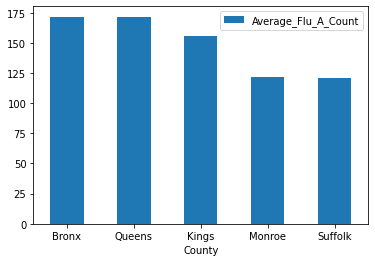

In [33]:
# TODO: Create a plot using matplotlib. - 4 points. 
# You may also use other libraries like plotly or seaborn if you like, but we can't guarantee the same level of help for these other libraries
plttt = flu_A_by_county.head(5)
plttt.plot.bar(x='County',rot=0)

##1.5 Looking at Hospital Infection Data

Now lets bring in our hospital infection data. 

Just like our `flu_df`, we need to clean and prepare our hospital infection data (more data wrangling!). Visualize the `hospital_df` dataframe below to take a look at it. 


In [34]:
#TODO: Take a look at the hopsital_df
display(hospital_df)

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column
0,0,New York State - All Hospitals,CLABSI Medical ICU,2018,100.0,NaN,120323.0,0.83,NaN,NaN,# CLABSI per 1000 line days,NaN,NaN
1,85,Auburn Community Hospital,SSI Hysterectomy,2018,NaN,NaN,NaN,NaN,NaN,NaN,"# SSI per 100 procedures, risk-adjusted","Not compared, less than 20 procedures","(42.940811, -76.564758)"
2,367,Samaritan Medical Center,CLABSI Medical Ward,2018,0.0,0.07,77.0,0.00,0.00,38.91,# CLABSI per 1000 line days,Not significantly different than NYS 2018 average,"(43.964928, -75.912827)"
3,528,Nassau University Medical Center,CLABSI Pediatric ICU,2018,NaN,NaN,NaN,NaN,NaN,NaN,# CLABSI per 1000 line days,"Not compared, less than 50 central line days","(40.725353, -73.554321)"
4,676,Clifton Springs Hospital and Clinic,SSI Colon,2018,NaN,NaN,NaN,NaN,NaN,NaN,"# SSI per 100 procedures, risk-adjusted","Not compared, less than 20 procedures","(42.960537, -77.138863)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,541,North Shore University Hospital,SSI CABG chest site,2008,18.0,12.86,640.0,3.02,1.79,4.77,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(40.77924, -73.702888)"
21657,924,Southside Hospital,CLABSI Medical Surgical ICU,2009,3.0,5.50,2935.0,1.02,0.21,2.99,# CLABSI per 1000 line days,Not significantly different than NYS 2009 average,"(40.725014, -73.240372)"
21658,739,Aurelia Osborn Fox Memorial Hospital,SSI Hip,2008,0.0,0.21,25.0,0.00,0.00,15.63,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(42.457405, -75.053261)"
21659,1456,Mount Sinai Hospital,SSI CABG donor site,2008,7.0,5.02,457.0,1.38,0.56,2.85,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(40.790482, -73.953766)"


#### **TODO: 1.5**
- Compute `second_null`, the column that has the second null in a given row (this won't be the same value for all rows) (8 points)

Before we clean this dataframe, we would like to answer a finicky question about the dataframe. We want to get an idea for the extent of the null values in the dataframe. For each row in hospital_df we want to know which column contains the **second null value in the row.**

Create a series named `second_null` that has the answer to this question. You may find that functions like `cumsum()` and `idxmax()` might be helpful -- we'd recommend looking at the documentation to think about how to use these before asking on Piazza!

In [35]:
# TODO: Compute `second_null`
second_null = hospital_df.where(hospital_df.isna(),0)
second_null = second_null.where(second_null.notna(),1)
second_null= second_null.astype(float)
second_null= second_null.cumsum(axis=1)
second_null= second_null.where(second_null<3,0)
second_null =second_null.idxmax(axis=1)

Pass the your `second_null` series into the grader cell below:

In [36]:
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'find_second_null', answer = second_null)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


##1.6 Cleaning up Hospital Infection Data

We now want to clean up our hospital infection data. Let's follow the some of the same steps we performed with the flu_df for dropping duplicates/nulls as well as two more cleaning tasks. 

#### **TODO: 1.6**
- Drop duplicates and null values from `hospital_df` 
- Create columns for `Latitude` and `Longitude`
- Replace every instance of "Not significantly different than NYS 2018 average" in the `Comparison Results` column with the string "p-value greater than 0.05, NOT significantly different than NYS 2018 average"
- Save this as `hospital_df_cleaned` (8 points)


First, drop all duplicates and nulls as we did before!

In [37]:
# TODO: Drop duplicates and nulls
hospital_df = hospital_df.drop_duplicates()
hospital_df = hospital_df.dropna()
# display(hospital_df)

Now, create columns for latitude and longitude

In [38]:
# TODO: Create columns for `Latitude` and `Longitude`
b = hospital_df['New_Georeferenced_Column']
clean1= b.str.strip('()').str.split(',')
Latitude = clean1.apply(lambda x : float(x[0])).rename('Latitude')
Longitude = clean1.apply(lambda x : float(x[1])).rename('Longtitude')
hospital_df['Latitude'] = Latitude
hospital_df['Longitude'] = Longitude
display(hospital_df)

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column,Latitude,Longitude
2,367,Samaritan Medical Center,CLABSI Medical Ward,2018,0.0,0.07,77.0,0.00,0.00,38.91,# CLABSI per 1000 line days,Not significantly different than NYS 2018 average,"(43.964928, -75.912827)",43.964928,-75.912827
6,889,University Hospital - Stony Brook Southampton Hospital,SSI Hysterectomy,2018,2.0,0.49,61.0,4.48,0.54,16.19,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2018 average,"(40.885757, -72.380692)",40.885757,-72.380692
18,181,Vassar Brothers Medical Center,CLABSI Medical Ward,2016,1.0,4.72,4144.0,0.24,0.01,1.34,# CLABSI per 1000 line days,Not significantly different than NYS 2016 average,"(41.694523, -73.935799)",41.694523,-73.935799
21,1456,Mount Sinai Hospital,SSI Colon,2016,45.0,39.50,946.0,5.69,4.15,7.61,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2016 average,"(40.790482, -73.953766)",40.790482,-73.953766
37,1463,NYU Langone Hospitals,SSI Hip,2014,1.0,0.80,63.0,1.19,0.03,6.62,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2014 average,"(40.742874, -73.974159)",40.742874,-73.974159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,541,North Shore University Hospital,SSI CABG chest site,2008,18.0,12.86,640.0,3.02,1.79,4.77,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(40.77924, -73.702888)",40.779240,-73.702888
21657,924,Southside Hospital,CLABSI Medical Surgical ICU,2009,3.0,5.50,2935.0,1.02,0.21,2.99,# CLABSI per 1000 line days,Not significantly different than NYS 2009 average,"(40.725014, -73.240372)",40.725014,-73.240372
21658,739,Aurelia Osborn Fox Memorial Hospital,SSI Hip,2008,0.0,0.21,25.0,0.00,0.00,15.63,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(42.457405, -75.053261)",42.457405,-75.053261
21659,1456,Mount Sinai Hospital,SSI CABG donor site,2008,7.0,5.02,457.0,1.38,0.56,2.85,"# SSI per 100 procedures, risk-adjusted",Not significantly different than NYS 2008 average,"(40.790482, -73.953766)",40.790482,-73.953766


Finally, replace the entries in `Comparison_Results`

In [39]:
#TODO: Replace the text as mentioned above!
hospital_df['Comparison_Results']=hospital_df['Comparison_Results'].apply(lambda x: x.replace('Not','p-value greater than 0.05, NOT'))
hospital_df_cleaned= hospital_df
hospital_df_cleaned

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column,Latitude,Longitude
2,367,Samaritan Medical Center,CLABSI Medical Ward,2018,0.0,0.07,77.0,0.00,0.00,38.91,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2018 average","(43.964928, -75.912827)",43.964928,-75.912827
6,889,University Hospital - Stony Brook Southampton Hospital,SSI Hysterectomy,2018,2.0,0.49,61.0,4.48,0.54,16.19,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2018 average","(40.885757, -72.380692)",40.885757,-72.380692
18,181,Vassar Brothers Medical Center,CLABSI Medical Ward,2016,1.0,4.72,4144.0,0.24,0.01,1.34,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2016 average","(41.694523, -73.935799)",41.694523,-73.935799
21,1456,Mount Sinai Hospital,SSI Colon,2016,45.0,39.50,946.0,5.69,4.15,7.61,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2016 average","(40.790482, -73.953766)",40.790482,-73.953766
37,1463,NYU Langone Hospitals,SSI Hip,2014,1.0,0.80,63.0,1.19,0.03,6.62,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2014 average","(40.742874, -73.974159)",40.742874,-73.974159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,541,North Shore University Hospital,SSI CABG chest site,2008,18.0,12.86,640.0,3.02,1.79,4.77,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2008 average","(40.77924, -73.702888)",40.779240,-73.702888
21657,924,Southside Hospital,CLABSI Medical Surgical ICU,2009,3.0,5.50,2935.0,1.02,0.21,2.99,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2009 average","(40.725014, -73.240372)",40.725014,-73.240372
21658,739,Aurelia Osborn Fox Memorial Hospital,SSI Hip,2008,0.0,0.21,25.0,0.00,0.00,15.63,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2008 average","(42.457405, -75.053261)",42.457405,-75.053261
21659,1456,Mount Sinai Hospital,SSI CABG donor site,2008,7.0,5.02,457.0,1.38,0.56,2.85,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2008 average","(40.790482, -73.953766)",40.790482,-73.953766


Pass the dataframe `hospital_df_cleaned` into the grader cell below (8 points)


In [40]:
# [CIS 545 PennGrader Cell] - 8 points
grader.grade(test_case_id = 'hospital_df_clean_up', answer = hospital_df_cleaned)

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 2: Grabbing more some more data: Generating Zipcodes

We are really interested in comparing whether flu cases are at all related to hospital acquired infections. As such we would like to do a location based comparison. We have a few tasks in this part: 

#### **TODO: Part 2**
1. Order the flu dataframe by Disease (lexographically) and create a new dataframe called `flu_df_limited` that contains only the first 300 rows. (5 points)

2. Order the hospital_df by `Facility_ID` (from least to greatest) and create a new dataframe called `hospital_df_limited` that contains only the first 300 rows. (5 points)


You will use the `flu_df_cleaned` and `hospital_df_cleaned` to make these new smaller dataframes. 

Notice both the flu dataframe and the hospital dataframe don't have a zipcode column:
- We want the zipcode for each row for each of the two dataframes
- Add a new column to the dataframe with the associated zipcode for the given longitude/latitude point
- This can be achieved through using the latitude and longitude. Google around for ways to convert latitude/longitude points into a zipcode in Python. We suggest a few options:

https://geopy.readthedocs.io/en/stable/

https://developer.mapquest.com/

https://stackoverflow.com/questions/54320931/python-code-for-reverse-geo-coding-using-google-api

This part can be a little challenging. Keep working at it and don't get discouraged -- TAs are also here to help (office hours & Piazza)!

You'll find that we might have to iterate over the values, and there are a couple ways to do this:
- `apply` functions that do operations in parallel (generally best-practice in pandas)
- for-loops and other iterators...but if you run this on the entire dataset it will be slow, so we would recommend thinking a bit on how to make things efficient if you choose to go this route

Make sure the added zipcode column name is named `flu_zipcode` for the `flu_limited_df` and  `hospital_zipcode` for the `hosptial_limited_df`. Note to keep the zipcode column type as strings. Name your two new dataframes `flu_limited_df` and  `hospital_limited_df` and submit them to their respective autograder cells below. 

In [41]:
# There are a few options to do this problem but we recommend using the geocoder package. Let's import it here. 
# import geocoder
# !pip install geopy
from geopy.geocoders import Nominatim
# Take a look at the geocoder.mapquest function
geolocator = Nominatim(user_agent="CIS520_HW2_shunl")


In [42]:
def zipcode(latitude,longitude):
  la_long = str(latitude)+','+str(longitude)
  location = geolocator.reverse(la_long)
  address = str.split(location.address,',')
  zipcode = address[-2]
  zipcode = zipcode.strip()
  if zipcode.isnumeric():
    return zipcode
  else:
    return 'None'

In [43]:
zipcode(44.594374,-77.310670)
# location = geolocator.reverse('40.594374,-77.310670')
# address = str.split(location.address,',')
# z = address[-2]
# z = z.strip()
# z.isnumeric()


'None'

In [44]:
# TODO: Create `flu_df_limited`
flu_df_limited = flu_df_cleaned.sort_values(by='Disease')
flu_df_limited = flu_df_limited.head(300)
display(flu_df_limited)

,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,Month,Day,Year,Latitude,Longitude
0,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,2010,40.783100,-73.971200
41477,CAPITAL DISTRICT,FRANKLIN,02/17/2018,INFLUENZA_A,16,"(44.5943743, -74.3106698)",2,17,2018,44.594374,-74.310670
41485,CENTRAL,OSWEGO,02/25/2017,INFLUENZA_A,84,"(43.4614428, -76.209258)",2,25,2017,43.461443,-76.209258
41486,METRO,SUFFOLK,11/29/2014,INFLUENZA_A,56,"(40.943554, -72.6922184)",11,29,2014,40.943554,-72.692218
41491,CENTRAL,ONONDAGA,12/13/2014,INFLUENZA_A,9,"(43.0065299, -76.1961167)",12,13,2014,43.006530,-76.196117
...,...,...,...,...,...,...,...,...,...,...,...
42457,CENTRAL,CHENANGO,12/02/2017,INFLUENZA_A,1,"(42.489732, -75.6049051)",12,2,2017,42.489732,-75.604905
42462,CENTRAL,CORTLAND,11/19/2016,INFLUENZA_A,1,"(42.5938237, -76.0762647)",11,19,2016,42.593824,-76.076265
42468,NYC,NEW YORK,02/01/2014,INFLUENZA_A,93,"(40.7831, -73.9712)",2,1,2014,40.783100,-73.971200
42473,CAPITAL DISTRICT,COLUMBIA,04/08/2017,INFLUENZA_A,5,"(42.2477286, -73.6268046)",4,8,2017,42.247729,-73.626805


In [45]:
# TODO: Create `hospital_df_limited`

hospital_df_limited= hospital_df_cleaned.sort_values(by='Facility_ID')
hospital_df_limited = hospital_df_limited.head(300)
display(hospital_df_limited)

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column,Latitude,Longitude
2832,1,Albany Medical Center Hospital,CLABSI Cardiothoracic ICU,2011,1.0,3.02,3311.0,0.30,0.01,1.68,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834
14255,1,Albany Medical Center Hospital,CLABSI Pediatric ICU,2012,1.0,4.19,2173.0,0.46,0.01,2.56,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2012 average","(42.65337, -73.773834)",42.653370,-73.773834
15712,1,Albany Medical Center Hospital,SSI CABG donor site,2011,0.0,2.09,315.0,0.00,0.00,0.91,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834
17441,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834
952,1,Albany Medical Center Hospital,SSI Colon,2011,21.0,15.48,335.0,6.72,4.16,10.27,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,5,St Peters Hospital,CLABSI Medical Surgical Ward,2018,1.0,4.69,6115.0,0.16,0.00,0.91,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2018 average","(42.657539, -73.803879)",42.657539,-73.803879
9034,5,St Peters Hospital,CLABSI Coronary ICU,2010,0.0,1.83,1000.0,0.00,0.00,3.00,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879
13752,5,St Peters Hospital,CLABSI Medical Surgical ICU,2010,6.0,3.71,2745.0,2.19,0.80,4.76,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879
9409,5,St Peters Hospital,SSI Colon,2009,12.0,16.20,377.0,3.60,1.86,6.29,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2009 average","(42.657539, -73.803879)",42.657539,-73.803879


In [46]:
# TODO: Find and add flu zipcodes to `flu_df_limited` -- and do the same for `hospital_df_limited`
%%time
hospital_df_limited['hospital_zipcode']= hospital_df_limited.apply(lambda x: zipcode(x['Latitude'],x['Longitude']),axis=1)

flu_df_limited['flu_zipcode']= flu_df_limited.apply(lambda x: zipcode(x['Latitude'],x['Longitude']),axis=1)


CPU times: user 2.21 s, sys: 550 ms, total: 2.76 s
Wall time: 5min 1s


In [47]:
display(hospital_df_limited)
display(flu_df_limited)

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column,Latitude,Longitude,hospital_zipcode
2832,1,Albany Medical Center Hospital,CLABSI Cardiothoracic ICU,2011,1.0,3.02,3311.0,0.30,0.01,1.68,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834,12208
14255,1,Albany Medical Center Hospital,CLABSI Pediatric ICU,2012,1.0,4.19,2173.0,0.46,0.01,2.56,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2012 average","(42.65337, -73.773834)",42.653370,-73.773834,12208
15712,1,Albany Medical Center Hospital,SSI CABG donor site,2011,0.0,2.09,315.0,0.00,0.00,0.91,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834,12208
17441,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208
952,1,Albany Medical Center Hospital,SSI Colon,2011,21.0,15.48,335.0,6.72,4.16,10.27,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2011 average","(42.65337, -73.773834)",42.653370,-73.773834,12208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,5,St Peters Hospital,CLABSI Medical Surgical Ward,2018,1.0,4.69,6115.0,0.16,0.00,0.91,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2018 average","(42.657539, -73.803879)",42.657539,-73.803879,12208
9034,5,St Peters Hospital,CLABSI Coronary ICU,2010,0.0,1.83,1000.0,0.00,0.00,3.00,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208
13752,5,St Peters Hospital,CLABSI Medical Surgical ICU,2010,6.0,3.71,2745.0,2.19,0.80,4.76,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208
9409,5,St Peters Hospital,SSI Colon,2009,12.0,16.20,377.0,3.60,1.86,6.29,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2009 average","(42.657539, -73.803879)",42.657539,-73.803879,12208


,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,Month,Day,Year,Latitude,Longitude,flu_zipcode
0,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,2010,40.783100,-73.971200,10024
41477,CAPITAL DISTRICT,FRANKLIN,02/17/2018,INFLUENZA_A,16,"(44.5943743, -74.3106698)",2,17,2018,44.594374,-74.310670,None
41485,CENTRAL,OSWEGO,02/25/2017,INFLUENZA_A,84,"(43.4614428, -76.209258)",2,25,2017,43.461443,-76.209258,13114
41486,METRO,SUFFOLK,11/29/2014,INFLUENZA_A,56,"(40.943554, -72.6922184)",11,29,2014,40.943554,-72.692218,11901
41491,CENTRAL,ONONDAGA,12/13/2014,INFLUENZA_A,9,"(43.0065299, -76.1961167)",12,13,2014,43.006530,-76.196117,13215
...,...,...,...,...,...,...,...,...,...,...,...,...
42457,CENTRAL,CHENANGO,12/02/2017,INFLUENZA_A,1,"(42.489732, -75.6049051)",12,2,2017,42.489732,-75.604905,13830
42462,CENTRAL,CORTLAND,11/19/2016,INFLUENZA_A,1,"(42.5938237, -76.0762647)",11,19,2016,42.593824,-76.076265,13101
42468,NYC,NEW YORK,02/01/2014,INFLUENZA_A,93,"(40.7831, -73.9712)",2,1,2014,40.783100,-73.971200,10024
42473,CAPITAL DISTRICT,COLUMBIA,04/08/2017,INFLUENZA_A,5,"(42.2477286, -73.6268046)",4,8,2017,42.247729,-73.626805,12565


In [48]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'hospital_df_limited', answer = hospital_df_limited)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [49]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'flu_df_clean_up', answer = flu_df_limited)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 3: Combining the data

When you become a full time data scientist, a lot of times, data will be spread out across multiple files/tables. The way to combine these tables is through join/merge operations. If you're familiar with SQL, this will be very familiar to you. If not, don't worry. I believe in you!

To start, here's a nice diagram which shows you the different types of joins


<p align = "center">
<img src = "https://i.stack.imgur.com/hMKKt.jpg" width= "600" align ="center"/>
</p>

A clarifying point: The two venn diagrams with the "(if Null)" are also called Left Outer Join and Right Outer Join



When working in data science, a large portion of the time we will want to perform an inner join (see the diagram above for some information on what an inner join is if you are not familiar). As such perform an inner join between the `hospital_df` and the `flu_df` on the Year columns (we would like matches between the Year column for `hospital_df` and the Year column for `flu_df`). Name your answer `inner_joined_df`  (4 points).

In [50]:
#TODO: Perform an inner join between the hospital_df and flu_df on the Year column. 
inner_joined_df = hospital_df_limited.merge(flu_df_limited,how='inner',on='Year')
inner_joined_df

,Facility_ID,Hospital_Name,Indicator_Name,Year,Infections_Observed,Infections_Predicted,Denominator,Indicator_Value,Indicator_Lower_Confidence_Limit,Indicator_Upper_Confidence_Limit,Indicator_Units,Comparison_Results,New_Georeferenced_Column,Latitude_x,Longitude_x,hospital_zipcode,Region,County,Week_Ending_Date,Disease,Count,County_Centroid,Month,Day,Latitude_y,Longitude_y,flu_zipcode
0,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208,NYC,BRONX,01/10/2015,INFLUENZA_A,317,"(40.8448, -73.8648)",1,10,40.844800,-73.864800,10462
1,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208,NYC,QUEENS,11/28/2015,INFLUENZA_A,4,"(40.7282, -73.7949)",11,28,40.728200,-73.794900,11366
2,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208,CENTRAL,OSWEGO,01/24/2015,INFLUENZA_A,105,"(43.4614428, -76.209258)",1,24,43.461443,-76.209258,13114
3,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208,CAPITAL DISTRICT,COLUMBIA,11/28/2015,INFLUENZA_A,1,"(42.2477286, -73.6268046)",11,28,42.247729,-73.626805,12565
4,1,Albany Medical Center Hospital,CLABSI Surgical Ward,2015,10.0,8.10,7764.0,1.29,0.62,2.37,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2015 average","(42.65337, -73.773834)",42.653370,-73.773834,12208,NYC,QUEENS,01/03/2015,INFLUENZA_A,147,"(40.7282, -73.7949)",1,3,40.728200,-73.794900,11366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8679,5,St Peters Hospital,SSI Colon,2010,13.0,14.54,368.0,4.25,2.26,7.27,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,40.783100,-73.971200,10024
8680,5,St Peters Hospital,SSI Hip,2010,5.0,5.67,756.0,0.97,0.32,2.27,"# SSI per 100 procedures, risk-adjusted","p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,40.783100,-73.971200,10024
8681,5,St Peters Hospital,CLABSI Neonatal ICU Level 3,2010,2.0,3.16,1262.0,1.59,0.19,5.74,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,40.783100,-73.971200,10024
8682,5,St Peters Hospital,CLABSI Coronary ICU,2010,0.0,1.83,1000.0,0.00,0.00,3.00,# CLABSI per 1000 line days,"p-value greater than 0.05, NOT significantly different than NYS 2010 average","(42.657539, -73.803879)",42.657539,-73.803879,12208,NYC,NEW YORK,11/20/2010,INFLUENZA_A,15,"(40.7831, -73.9712)",11,20,40.783100,-73.971200,10024


In [51]:
# [CIS 545 PennGrader Cell] - 4 points
grader.grade(test_case_id = 'basic_join_test', answer = inner_joined_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### **TODO: Part 3.1**

Let's now do a join that is a little bit more interesting / uncommon.

- Find all the zipcodes that strictly appear in DO NOT appear in both datasets:

    *  If 11111 is in flu data and hospital infection data, we don't want it
    *  If 22222 is in flu data but not in hospital, we want to keep it
    * If 33333 is in hospital infection data but not in flu, we want to keep it

- In other words, we want all the zipcodes that have flu cases with no hospital infections (this is probably impossible in the real world, but our data is a small sample of the real world). **Note we are using the hospital_df_limited and flu_df_limited dataframes here** 

- *Hint*: Google around for Exclusive Full Joins

- We want the final answer as a two column dataframe with columns named: `flu_zips`, `hospital_zips` (6 points)
    * `flu_zips` should contain the zipcodes that only exist within the flu dataset and vice-a-versa for `hospital_zips` column
    * If there is a row where hospital_zip has a zipcode, that same row should not have a `flu_zips` entry (Should be NaN) as otherwise, that means that zipcode is shared between both datasets
    * Make sure your final answer dataframe is named: `combined_df`

In [52]:
# TODO: Create combined_df

combined = pd.merge(hospital_df_limited,flu_df_limited,how='outer',left_on='hospital_zipcode',right_on='flu_zipcode')

combined_df = combined[['hospital_zipcode','flu_zipcode']]
combined_df = combined_df.rename(columns={'hospital_zipcode':'hospital_zips','flu_zipcode':'flu_zips'})

Enter your newly created dataframe `combined_df` to the penngrader cell below:

In [53]:
# [CIS 545 PennGrader Cell] - 6 points
grader.grade(test_case_id = 'full_ex_join_test', answer = combined_df)

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 4: Working With Zillow and AirBnB data!

Let's now look at some Zillow and AirBnB data! As a data scientist, you will often be asked to work with many different kinds of datasets (and through this course you will get hands on experience with data from many different fields!)


Read in the Zillow and AirBnB data to pandas dataframes and take a look at it so that you are familiar with the features (columns) in both datasets. 

In [54]:
# TODO: Take a look at the Zillow Df
zillow_df = pd.read_csv('/content/UPDATED_2_zillow_df.csv')
display(zillow_df)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,BLOCK,LOT,BUILDING_CLASS_AT_PRESENT,ADDRESS,ZIPCODE,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,SALE_DATE,id
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,392,6,C2,153 AVENUE B,10009.0,1633.0,6440.0,1900.0,6625000.0,7/19/17,1
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,402,21,C4,154 EAST 7TH STREET,10009.0,2272.0,6794.0,1913.0,3936272.0,9/23/16,4
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,404,55,C2,301 EAST 10TH STREET,10009.0,2369.0,4615.0,1900.0,8000000.0,11/17/16,5
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,406,32,C4,210 AVENUE B,10009.0,1750.0,4226.0,1920.0,3192840.0,9/23/16,7
4,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,387,153,D9,629 EAST 5TH STREET,10009.0,4489.0,18523.0,1920.0,16232000.0,11/7/16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28517,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,34,B9,37 QUAIL LANE,10309.0,2400.0,2575.0,1998.0,450000.0,11/28/16,84544
28518,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,7349,78,B9,32 PHEASANT LANE,10309.0,2498.0,2377.0,1998.0,550000.0,4/21/17,84545
28519,Staten_Island,WOODROW,02 TWO FAMILY DWELLINGS,7351,60,B2,49 PITNEY AVENUE,10309.0,4000.0,1496.0,1925.0,460000.0,7/5/17,84546
28520,Staten_Island,WOODROW,22 STORE BUILDINGS,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,208033.0,64117.0,2001.0,11693337.0,12/21/16,84547


In [55]:
#TODO: Take a look at the AirBnB Df
airbnb_df = pd.read_csv('/content/UPDATED_2_airbnb_df.csv')
display(airbnb_df)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zipcode
0,1,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,single,149,1,9,10/19/18,0.21,6,365,11218
1,2,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,whole,225,1,45,5/21/19,0.38,2,355,10018
2,3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,whole,89,1,270,7/5/19,4.64,1,194,11238
3,4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,whole,80,10,9,11/19/18,0.10,1,0,10029
4,5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,whole,200,3,74,6/22/19,0.59,1,129,10016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27989,27990,"trip NYC - your Couch - clean, cheap, close to all",182488531,Kevin4,Queens,Elmhurst,40.73753,-73.87054,share,15,1,19,6/20/19,1.71,2,271,11373
27990,27991,"*NEW* Bright, Spacious & Quiet Bedroom by Times SQ",198835140,Leivan,Manhattan,Hell's Kitchen,40.76129,-73.98859,single,90,2,55,6/23/19,4.61,1,49,10036
27991,27992,Big 1BR in PRIME Bushwick! 2 blocks to L Train!,6293227,Nish,Brooklyn,Bushwick,40.70148,-73.91834,whole,90,3,9,6/1/19,0.74,1,0,11237
27992,27993,"Estudio 1 Brooklyn, NY.",198853982,Brigit,Brooklyn,Cypress Hills,40.68816,-73.87193,whole,90,2,34,6/24/19,2.80,2,120,11208


##4.1 Correlation Matrix

We want to see if, on average, there is any correlation between the gross square footage of apartments versus airbnb prices for shared zipcodes, and **if there is a correlation, how strong is it?**


#### **TODO: 4.1**
- Find the average value of each column for each zipcode within Zillow
- Find the average value of each column for each zipcode within AirBnb
- Merge them on the matching column:
    * Your merged table may now have 1-3 nonsense columns
    * Since the values have been averaged by zipcode, some of these columns no longer include valid information... think on it and visit office hours if you get stuck! 
    * Identify and drop these (can also be done before merging)

- Generate the correlation matrix. Find the value associated with **Zillow Gross Square footage vs. Airbnb Price**. *Hint*: Read about Pandas "corr()" function.

- Name your final answer correlation matrix dataframe to: `correlation_matrix` (5 points)

- Plot a correlation matrix -- just to get a sense of what it might look like!


**Note: You can correctly answer the following section just using Zillow's gross square footage column and Airbnb's price column but after this question, we want to plot a correlation matrix which will require all the columns(not just the two listed above)**

In [56]:
# TODO: Create your correlation matrix
zillow_df_byzip = zillow_df.groupby(by='ZIPCODE',as_index=False).mean()
airbnb_df_byzip = airbnb_df.groupby(by='zipcode',as_index=False).mean()
# display(zillow_df_byzip)
# display(airbnb_df_byzip)
zillow_df_join = zillow_df_byzip.merge(airbnb_df_byzip,left_on='ZIPCODE',right_on='zipcode')
zillow_df_join.drop(columns=['id_x','zipcode','id_y','host_id'],inplace=True)
# display(zillow_df_join)
correlation_matrix= zillow_df_join.corr()
correlation_matrix

,ZIPCODE,BLOCK,LOT,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
ZIPCODE,1.000000,0.610283,-0.111614,-0.268238,-0.314787,0.079247,-0.298540,-0.398480,0.551096,-0.356521,-0.450542,0.228293,0.332995,-0.334814,0.333924
BLOCK,0.610283,1.000000,-0.000170,-0.141402,-0.237998,0.233650,-0.234486,-0.353179,0.577455,-0.297214,-0.444935,0.201525,0.365334,-0.197880,0.471887
LOT,-0.111614,-0.000170,1.000000,0.242259,-0.020067,0.335491,-0.025537,0.102329,-0.013973,-0.078731,0.040121,-0.094617,-0.086840,-0.092304,-0.043803
LAND_SQUARE_FEET,-0.268238,-0.141402,0.242259,1.000000,0.537471,0.221794,0.336105,0.137775,-0.118233,0.024285,0.054639,-0.098148,-0.095575,0.143672,-0.178614
GROSS_SQUARE_FEET,-0.314787,-0.237998,-0.020067,0.537471,1.000000,0.175736,0.922209,0.047076,-0.172018,0.250503,0.248059,-0.149194,-0.156892,0.534339,-0.164858
YEAR_BUILT,0.079247,0.233650,0.335491,0.221794,0.175736,1.000000,0.233948,-0.252755,-0.025818,-0.172988,-0.222033,0.046124,0.137312,0.090607,0.332937
SALE_PRICE,-0.298540,-0.234486,-0.025537,0.336105,0.922209,0.233948,1.000000,0.006009,-0.180997,0.288503,0.261104,-0.149162,-0.162949,0.551779,-0.158165
latitude,-0.398480,-0.353179,0.102329,0.137775,0.047076,-0.252755,0.006009,1.000000,0.349127,-0.096914,0.123208,-0.000256,-0.052404,0.064450,-0.135522
longitude,0.551096,0.577455,-0.013973,-0.118233,-0.172018,-0.025818,-0.180997,0.349127,1.000000,-0.326864,-0.335525,0.241179,0.329785,-0.124773,0.324480
price,-0.356521,-0.297214,-0.078731,0.024285,0.250503,-0.172988,0.288503,-0.096914,-0.326864,1.000000,0.368324,-0.234551,-0.305022,0.362155,-0.301777


Submit the correlation matrix to the autograder 
(5 points)

In [57]:
# [CIS 545 PennGrader Cell] - 5 points
grader.grade(test_case_id = 'corr_mat', answer = correlation_matrix)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Here we provide code for you to visualize the correlation matrix. In the following code snippet below, please assign your correlation matrix to the variable named "corr" and then run the cell. You should see a correlation matrix!

This isn't a graded cell; but you might find that knowing how to plot correlation matrices is helpful in general EDA and maybe later on in the class! :)

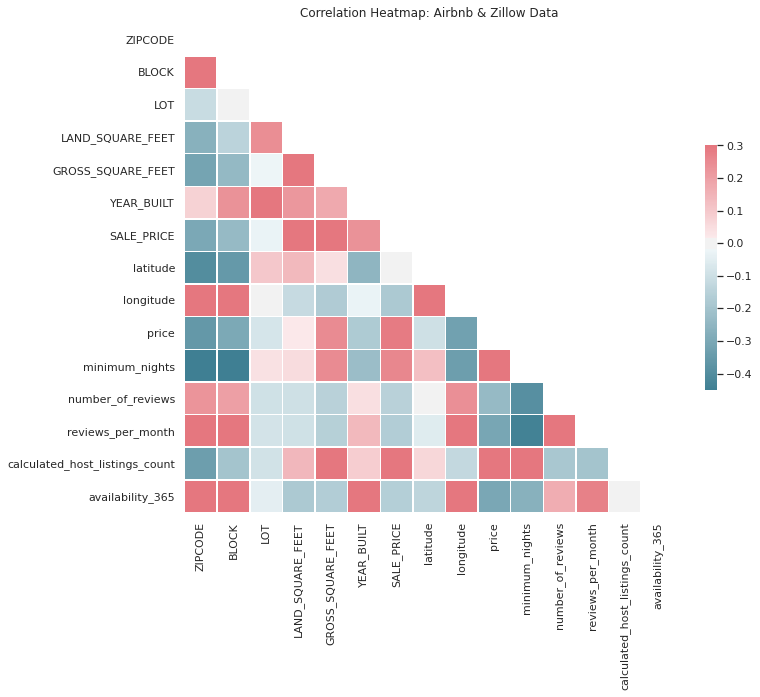

In [58]:
sns.set(style = "white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# ASSIGN THE "corr" VARIABLE TO YOUR CORRELATION MATRIX
corr = correlation_matrix

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap: Airbnb & Zillow Data")
plt.show()

##4.2 Joining columns on roughly similar data

**This problem is pretty difficult conceptually. We're putting it in the assignment because we know you all can do this!**

There will be times when you have similar (but not exact) data between columns that you would like to join on. Convential joins, like the one you did above, will scan through each of the specified join columns, and find **exact** matches to establish that the rows from the associated datasets can be combined together into one row. 

- But what happens if the join operation sees "Mr.Smith" in one dataset versus "Mr Smith"? It will skip over and think these two entries can't be joined even though there is a minor difference and the two values should be matched. This is where we combine what we call "n-grams" using a technique called Jaccard similarity.

- Let's break this down: An n-gram is a contiguous sequence of n items. An example would be given the sentence: "CIS 545 is a great class" ... If we were looking at an n-gram of two, the results would be: ["CIS 545", "545 is", "is a", "a great", "great class"]

- The above example is tokenizing/breaking up the n-grams by spaces. However, we can also do it characterwise. Given "CIS 545 is a great class" with n-gram of 2 and doing characterwise splits, we will have: ["CI", "IS", "S5", "54", "45", "5i", ... ]


Jaccard similarity is a way to measure similarity between two sets. There's plenty of other documentation online for it, but a mathematical notation example is below:

<p align = "center">
<img src = "https://i.ytimg.com/vi/Ah_4xqvS1WU/maxresdefault.jpg" width= "600" align ="center"/>
</p>



We will focus on the `NEIGHBORHOOD` column in zillow_df and the `neighbourhood` in `airbnb_df`. If you take a look, these two columns share the same type of information but are formatted differently (i.e. `UPPER WEST SIDE (59-79)` in `zillow_df` versus `Upper West Side` in airbnb_df. 

We know these columns mean very similar things...but merge/join operations don't. A possibility is to clean that column so that the formats match. But what if you have a ton of entries and you can't possibly account for everything?

Our goal here is to join the neighbourhood columns without having to perform extensive cleaning operations in one of the columns.

#### **TODO: 4.2**
- Take your `zillow_df` `NEIGHBORHOOD` column and lowercase all the entries except the first entry (aka capitalize). We do this to make the neighborhood columns between the two datasets as similar as possible and reducing cleaning necessary
- Define a Tokenizer with 5 grams. We have already imported our recommended library to do this at the top. Try looking at this for how to define a tokenzier: http://anhaidgroup.github.io/py_stringmatching/v0.2.x/QgramTokenizer.html
- Do a jaccard join:
    * Again, we have already imported our recommended library for doing this at the top
    * Look here for more documentation: http://anhaidgroup.github.io/py_stringsimjoin/v0.1.x/api/jaccard_join.html 
    * When calling this function, set the `l_out_attrs` and `r_out_attrs` parameters to their associated table's neighbourhood column so that we keep those columns as we want to see our join results

- When selecting the tolerance, play around with some values between $$.1 < x < .5$$ to see what the join thinks could be "joinable"

- Drop duplicates from your jaccard-joined dataframe based on both neighbourhood columns as you will have a lot of duplicates. In other words, you might have 100+ entries of [`MURRAY HILL`, `MURRAY HILL`]. We only want one entry for this.

- Name your answer to this section: `answer_df` (14 points) -- this is a large test case since it's a super involved question. Good luck!

In [59]:
# TODO: Preprocess `zillow_df` and create a tokenizer with 5 grams
zillow_df['NEIGHBORHOOD'] = zillow_df['NEIGHBORHOOD'].apply(lambda x : x.capitalize())
tokenizer = sm.QgramTokenizer(qval=5)


In [60]:
# TODO: Create your jaccard join and drop duplicates. Name your answer dataframe answer_df. 
# display(zillow_df)

answer_df= ssj.jaccard_join(zillow_df, airbnb_df,'id','id','NEIGHBORHOOD','neighbourhood',tokenizer,0.5,l_out_attrs=['NEIGHBORHOOD'],r_out_attrs=['neighbourhood'])
answer_df.drop(columns=['l_id','r_id','_id'],inplace=True)
answer_df = answer_df.drop_duplicates()
display(answer_df)

/usr/local/lib/python3.6/dist-packages/py_stringsimjoin/utils/validation.py:30: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  if attr_type != pd.np.object:
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:09


,l_NEIGHBORHOOD,r_neighbourhood,_sim_score
0,Kensington,Kensington,1.000000
39,Clinton hill,Clinton Hill,0.523810
106,Murray hill,Murray Hill,0.500000
132,Bedford stuyvesant,Bedford-Stuyvesant,0.571429
738,Chinatown,Chinatown,1.000000
...,...,...,...
2172483,Little neck,Little Neck,0.500000
2231611,Rosebank,Rosebank,1.000000
2288736,Hollis,Hollis,1.000000
2595059,Arden heights,Arden Heights,0.545455


Find a row entry in this dataframe where the Airbnb and Zillow neighborhoods aren't the same but are similar (i.e `Clinton` vs `Clinton Hill` or `Mill basin` vs `Mill Basin`. Assign (You can manually type it out) the associated name to the following variables based on the dataset they originally belonged to.

When you submit your answer to the autograder, make it a tuple of `(result dataframe from the join, airbnb_neighborhood, zillow_neighborhood)`. (14 points)

It should be possible to earn partial credit for this! But it definitely is a harder problem; good luck!

In [61]:
# Add the Airbnb and Zillow neighborhood examples
airbnb_neighborhood = 'Clinton Hill'
zillow_neighborhood = 'Clinton hill'

answer = (answer_df, airbnb_neighborhood, zillow_neighborhood)

In [62]:
# [CIS 545 PennGrader Cell] - 14 points
grader.grade(test_case_id = 'jaccard_join', answer = answer)

Correct! You earned 14/14 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#Part 5 XPath
###Brought to you by popular demand from students...

So far, we've looked at data from Airbnb and Zillow. It turns out Airbnb was a unicorn startup! According to Wikipedia, a unicorn is a "privately held startup company with a current valuation of US$1 billion or more."

Let's look into unicorn startup companies some more. Take a look at this wikpedia page that has a full list of unicorn startup companies. https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies. <br>
Note that Uber is on the former unicorns list since it IPO'd, and Airbnb's delayed IPO means it still is as well.

#### **TODO: Part 5**

- Using this data, return a dataframe that has the top 50 unicorn companies by Valuation. Your dataframe should be 
    1. In descending order by Valuation. 
    2. Have exactly two columns, `Company` and `Valuation`

  *Hint*: The first row should be something like: 

>Company | Valuation
>--- | ---
>Ant Financial | 150

- There are many different ways to do this but we recommend trying it with XPath. That's also how we will recommend in office hours! 

- Assign the answer of this section to a dataframe named: `answer_df` and submit it in a tuple with the `path` for xpath (9 points)

In [63]:
# TODO: Request the data and build the DOM tree (we've done this for you!)
w = requests.get("https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies")
dom_tree = html.fromstring(w.content)
print(dom_tree)

<Element html at 0x7f7248c49cc8>


In [101]:
# TODO: Create `answer_df` and set your final xpath "path"
# `path` should be the value you pass in for dom_tree.xpath()

path='/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody//tr//td[1]//text()'
path2='/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody//tr//td[2]//text()'
answer_df = pd.DataFrame()
answer_df['Company'] = dom_tree.xpath(path)
answer_df=answer_df.astype(str)
answer_df = answer_df.drop_duplicates(keep=False)
answer_df = answer_df.reset_index().drop(columns='index')
valuation = dom_tree.xpath(path2)
answer_df2 = pd.DataFrame(valuation)
answer_df2 = answer_df2.astype(str)
answer_df2[0] = answer_df2[0].apply(lambda x: x.strip('\n'))
answer_df['Valuation'] = answer_df2

In [100]:
# Check the path prints!
# It should be in the form of '/.../text()' (may vary slightly; only include the actual parameter used in dom_tree.xpath!)
print(path)
display(answer_df)


('/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody//tr//td[1]//text()', '/html/body/div[3]/div[3]/div[5]/div[1]/table[2]/tbody//tr//td[2]//text()')


,Company,Valuation
0,Ant Financial,150
1,Bytedance,100
2,DiDi,51.6
3,SpaceX,46
4,Stripe,36.0
...,...,...
348,Lucid Software,1+
349,VAST Data,1
350,Octopus Energy,1+
351,Cazoo,1+


In [102]:
# [CIS 545 PennGrader Cell] - 9 points
grader.grade(test_case_id = 'xPath_test', answer = (answer_df, path))

Correct! You earned 9/9 points. You are a star!

Your submission has been successfully recorded in the gradebook.


You're done! Time to wrap things up and submit HW1.

# HW Submission

The good news is you basically know the score you already got because of the autograder. In fact, since for the first time the autograder is integrated into Gradescope, you should be able to see your autograder score automatically! There is one question we're manually grading (and we'll check for plagirism), but for the most part things are relatively certain.

Before you submit on Gradescope (you must submit your notebook to receive credit):


1.   Restart and Run-All to make sure there's nothing wrong with your notebook
2.   **Double check that you have the correct PennID (all numbers) in the autograder**. 
3. Make sure you've run all the PennGrader cells
4. Go to the "File" tab at the top left, and click "Download .ipynb" and upload the Python notebook to Gradescope directly!

**Let the course staff know ASAP if you have any issues submitting, but otherwise best of luck! Congrats on finishing the first HW.**